In [22]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as optimize
import scipy.integrate as integrate
from iminuit import Minuit

In [23]:
#Daten einlesen
with open('MagnetfeldKalibrationAbsteigendeSpannung.txt') as data:
    spannung_raw_ab = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationAbsteigendeSpannung.txt') as data:
    magnetfeldstaerke_ab = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationAbsteigendeSpannung.txt') as data:
    spannung_transformed_ab = np.loadtxt(data, usecols= 2)

with open('MagnetfeldKalibrationAufsteigendeSpannung.txt') as data:
    spannung_raw_auf = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationAufsteigendeSpannung.txt') as data:
    magnetfeldstaerke_auf = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationAufsteigendeSpannung.txt') as data:
    spannung_transformed_auf = np.loadtxt(data, usecols= 2)

with open('MagnetfeldKalibrationNachherAbsteigendeSpannung.txt') as data:
    spannung_raw_ab_nach = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationNachherAbsteigendeSpannung.txt') as data:
    magnetfeldstaerke_ab_nach = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationNachherAbsteigendeSpannung.txt') as data:
    spannung_transformed_ab_nach = np.loadtxt(data, usecols= 2)

with open('MagnetfeldKalibrationNachherAufsteigendeSpannung.txt') as data:
    spannung_raw_auf_nach = np.loadtxt(data, usecols= 0)
with open('MagnetfeldKalibrationNachherAufsteigendeSpannung.txt') as data:
    magnetfeldstaerke_auf_nach = np.loadtxt(data, usecols= 1)
with open('MagnetfeldKalibrationNachherAufsteigendeSpannung.txt') as data:
    spannung_transformed_auf_nach = np.loadtxt(data, usecols= 2)

In [24]:
parameters = {'xtick.labelsize': 20, 'ytick.labelsize': 20}
plt.rcParams.update(parameters)

#Linearfit 
def line(x, a, b):
    return a + x * b

#Reduced chi square
def redchisqr(ydata, yfit, deg=2, sd=None):
    # Chi-square statistic  
        if sd==None:  
            chisq=np.sum((ydata-yfit)**2)  
        else:  
            chisq=np.sum( ((ydata-yfit)/sd)**2)  
                
        # Number of degrees of freedom assuming 2 free parameters  
        nu=ydata.size-1-deg  
        
        return chisq/nu       


spannung_fehler = [0.02]* np.size(spannung_raw_auf)
magnetfeld_fehler = [1] * np.size(spannung_raw_auf)


spannung_fehler_ab = [0.02]* np.size(spannung_raw_ab)
magnetfeld_fehler_ab = [1] * np.size(spannung_raw_ab)

Steigung: 22.915756841796245
Steigung Fehler: 0.16253251857334228
Y-Abschnitt: 289.07102519472045
Y-Abschnitt Fehler: 0.3552688721910411
Reduced chi square: 0.5043779740100673


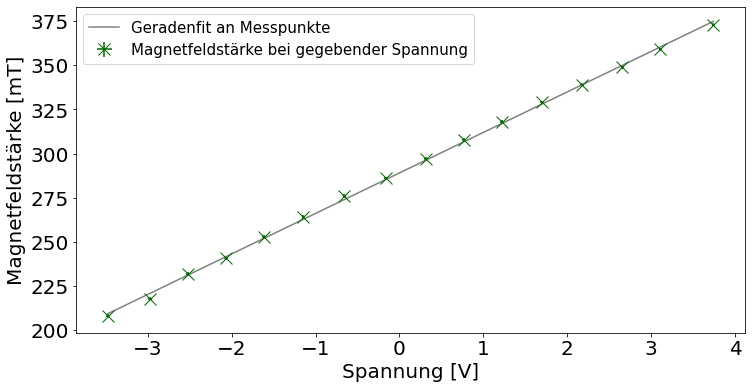

In [25]:
#Magnetfeld fit aufsteigend
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_auf, magnetfeldstaerke_auf,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung")

params, cov = optimize.curve_fit(line,spannung_transformed_auf, magnetfeldstaerke_auf)
x_fit = np.linspace(spannung_transformed_auf[0],spannung_transformed_auf[np.size(spannung_transformed_auf)-1])
ax.errorbar(spannung_transformed_auf, magnetfeldstaerke_auf, xerr=spannung_fehler, yerr=magnetfeld_fehler,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1])
y_fit_chi = line(spannung_transformed_auf, params[0], params[1])
ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_auf, y_fit_chi, 1, 2)

print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)
 
ax.legend(fontsize=15)
plt.show()

Steigung: 21.928268049732925
Steigung Fehler: 0.3414759726961971
Y-Abschnitt: 293.932344628592
Y-Abschnitt Fehler: 0.7073485955255284
Reduced chi square: 1.835854006044807


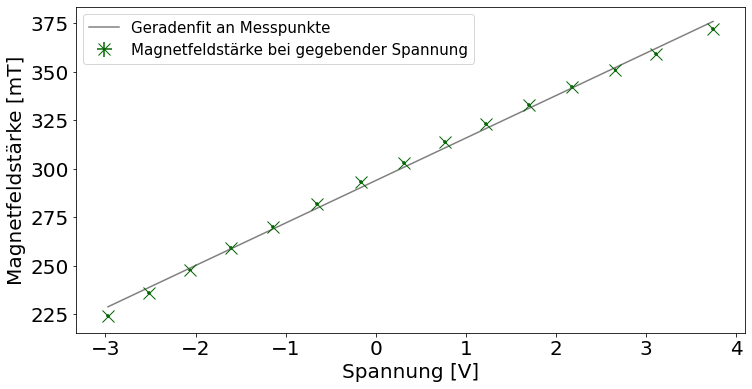

In [26]:
#Magnetfeld fit absteigend
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_ab, magnetfeldstaerke_ab,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung")

params, cov = optimize.curve_fit(line,spannung_transformed_ab, magnetfeldstaerke_ab)
x_fit = np.linspace(spannung_transformed_ab[0],spannung_transformed_ab[np.size(spannung_transformed_ab)-1])
ax.errorbar(spannung_transformed_ab, magnetfeldstaerke_ab, xerr=spannung_fehler_ab, yerr=magnetfeld_fehler_ab,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1])
y_fit_chi = line(spannung_transformed_ab, params[0], params[1])
ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_ab, y_fit_chi, 1, 2)

print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)

ax.legend(fontsize=15)

Steigung: 23.75404631232355
Steigung Fehler: 0.27128311976228897
Y-Abschnitt: 288.8359627923315
Y-Abschnitt Fehler: 0.5934054601953587
Reduced chi square: 1.4085086723111222


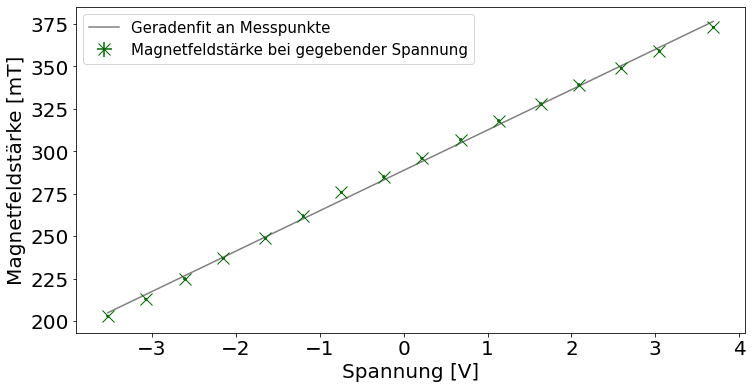

In [27]:
#Magnetfeld fit aufsteigend nachher
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_auf_nach, magnetfeldstaerke_auf_nach,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung nach Experiment")

params, cov = optimize.curve_fit(line,spannung_transformed_auf_nach, magnetfeldstaerke_auf_nach)
x_fit = np.linspace(spannung_transformed_auf_nach[0],spannung_transformed_auf_nach[np.size(spannung_transformed_auf_nach)-1])
ax.errorbar(spannung_transformed_auf_nach, magnetfeldstaerke_auf_nach, xerr=spannung_fehler, yerr=magnetfeld_fehler,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1])
y_fit_chi = line(spannung_transformed_auf_nach, params[0], params[1])
ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_auf_nach, y_fit_chi, 1, 2)

print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)

ax.legend(fontsize=15)

Steigung: 22.16575505835369
Steigung Fehler: 0.3468078578248108
Y-Abschnitt: 296.138536075956
Y-Abschnitt Fehler: 0.7586084944990416
Reduced chi square: 2.3019285748612086


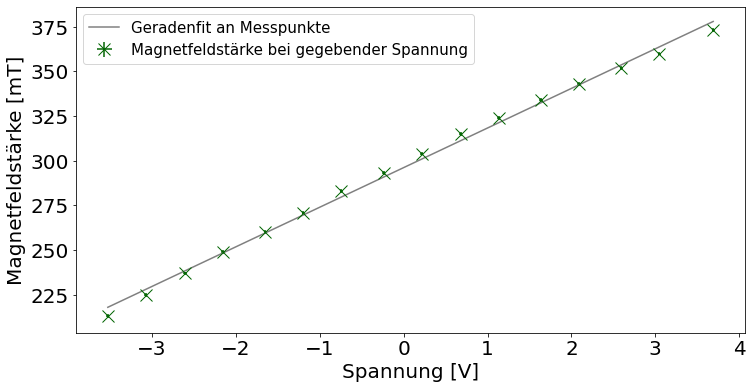

In [28]:
#Magnetfeld fit absteigend nachher
fig, ax = plt.subplots(figsize=(12,6))

#Name for axis
ax.set_xlabel('Spannung [V]', fontsize=20)
ax.set_ylabel('Magnetfeldstärke [mT]', fontsize=20)
#Plotten der unskalierten Kurven
#ax.plot(spannung_transformed_ab, magnetfeldstaerke_ab,'o',markersize=3, color = "lightblue",label = "Magnetfeldkalibrierung bei ansteigender Spannung")

params, cov = optimize.curve_fit(line,spannung_transformed_ab_nach, magnetfeldstaerke_ab_nach)
x_fit = np.linspace(spannung_transformed_ab_nach[0],spannung_transformed_ab_nach[np.size(spannung_transformed_ab_nach)-1])
ax.errorbar(spannung_transformed_ab_nach, magnetfeldstaerke_ab_nach, xerr=spannung_fehler, yerr=magnetfeld_fehler,fmt='x',markersize=12, color = "darkgreen",label = "Magnetfeldstärke bei gegebender Spannung")
y_fit = line(x_fit, params[0], params[1])
y_fit_chi = line(spannung_transformed_ab_nach, params[0], params[1])
ax.plot(x_fit, y_fit, color = "grey", label="Geradenfit an Messpunkte")
reduced_chi_sqare = redchisqr(magnetfeldstaerke_ab_nach, y_fit_chi, 1, 2)

print("Steigung:",params[1])
print("Steigung Fehler:", np.sqrt(cov[1,1]))
print("Y-Abschnitt:", params[0])
print("Y-Abschnitt Fehler:",np.sqrt(cov[0,0]))
print("Reduced chi square:", reduced_chi_sqare)

ax.legend(fontsize=15)